<a href="https://colab.research.google.com/github/maxinusss/greynoise_challenge/blob/main/greynoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot
from statistics import stdev
from sklearn.model_selection import train_test_split


sns.set_style("whitegrid")


Read in Data and format 

In [ ]:
log = pd.read_csv('jdni_logs.csv')
print(log.shape)
print(log.info())
print(log.describe())
print(log.isnull().sum())  ##Check for nulls in the data set
meancount = np.mean(log['minute_count'])
stdcount = stdev(log['minute_count'])

(157409, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157409 entries, 0 to 157408
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamp     157409 non-null  object
 1   minute_count  157409 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB
None
        minute_count
count  157409.000000
mean        2.207116
std         2.544893
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       273.000000
timestamp       0
minute_count    0
dtype: int64


In [ ]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
# log['date'] = log['timestamp'].dt.date
# log['time'] = log['timestamp'].dt.time
log['strdate'] = log['timestamp'].dt.strftime('%Y-%m-%d')
log['hour'] = log['timestamp'].dt.strftime("%H")
log['minute'] = log['timestamp'].dt.strftime("%M")

log.sort_values(by = ['timestamp'], inplace = True)

threshold = meancount + stdcount*3


log['spikeflag'] = np.where(log['minute_count'] > threshold, 1, 0)
log['spikelabel'] = np.where(log['minute_count'] > threshold, 'potential spike', 'likely not spike')

print(log.groupby('spikeflag').size())
log

spikeflag
0    155883
1      1526
dtype: int64


,timestamp,minute_count,strdate,hour,spikeflag,spikelabel,minute
0,2021-11-16 03:34:54,1,2021-11-16,03,0,likely not spike,34
1,2021-11-16 03:50:40,1,2021-11-16,03,0,likely not spike,50
2,2021-11-16 03:59:42,2,2021-11-16,03,0,likely not spike,59
3,2021-11-16 04:32:06,1,2021-11-16,04,0,likely not spike,32
4,2021-11-16 06:57:30,1,2021-11-16,06,0,likely not spike,57
...,...,...,...,...,...,...,...
157404,2021-12-21 00:05:00,3,2021-12-21,00,0,likely not spike,05
157405,2021-12-21 00:05:01,1,2021-12-21,00,0,likely not spike,05
157406,2021-12-21 00:05:06,1,2021-12-21,00,0,likely not spike,05
157407,2021-12-21 00:05:28,2,2021-12-21,00,0,likely not spike,05


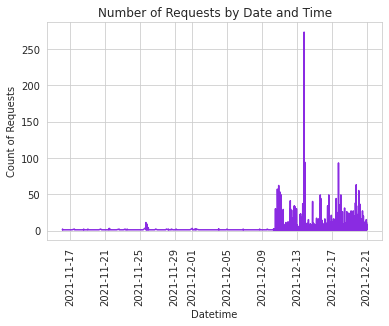

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


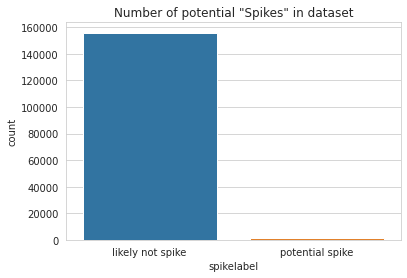

In [ ]:
##Let's graph all of the data to see a high-level overview
sns.lineplot(x=log.timestamp, y=log.minute_count, color = 'blueviolet')
plt.xlabel("Datetime")
plt.ylabel('Count of Requests')
plt.title('Number of Requests by Date and Time')
plt.xticks(rotation = 90)
plt.show()

print("")
ax = sns.countplot(log['spikelabel'])
plt.title('Number of potential "Spikes" in dataset')
plt.show()

From the above graph, it is clear that after some date between 12/9 and 12/13, there begins to be significantly more requests. 

In [ ]:
##Let's find the max count of requests and understand some more about that time
maxcount = max(log['minute_count'])
maxlog = log[log['minute_count'] == maxcount]
maxlog.reset_index(inplace = True, drop = True)
maxdate = list(maxlog['strdate'])
maxcountdf = log[log['strdate'].isin(maxdate)]  ##new dataframe for only the day where the max count exists

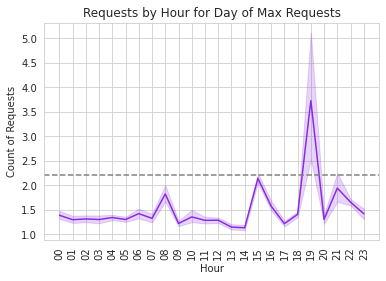

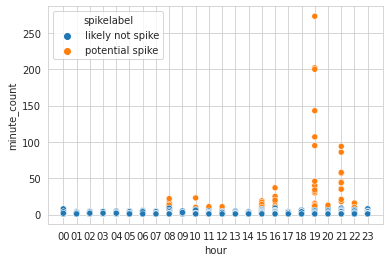

In [ ]:
##Plot just that day
sns.lineplot(x=maxcountdf.hour, y=maxcountdf.minute_count, color = 'blueviolet')
plt.xlabel("Hour")
plt.ylabel('Count of Requests')
plt.title('Requests by Hour for Day of Max Requests')
plt.xticks(rotation = 90)
plt.axhline(meancount, linestyle ='--', color = 'grey', label = 'Overall mean')
plt.show()

sns.scatterplot(x=maxcountdf.hour, y=maxcountdf.minute_count, hue = log.spikelabel)
plt.axhline(meancount, linestyle ='--', color = 'grey', label = 'Overall mean')
plt.show()

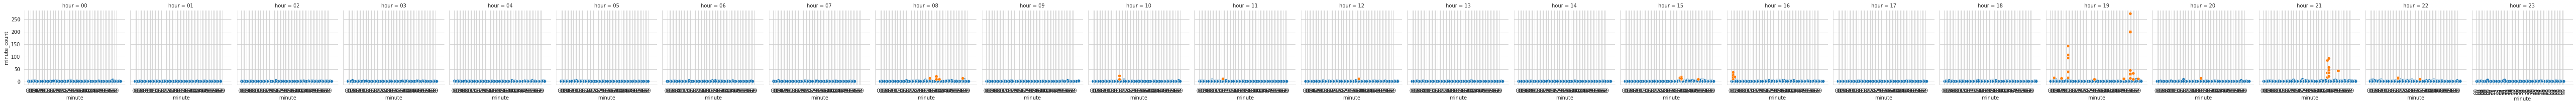

In [ ]:
p = sns.FacetGrid(maxcountdf, hue='spikelabel', col = 'hour')
p = p.map(sns.scatterplot, "minute", "minute_count")
plt.xticks(rotation = 90)
plt.show()